# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Mining Goal
Using regression analysis, find the type of correlation (positive, negative, or none) between one or more features and the sale price of used cars, so that used cars dealerships can estimate the sales price of cars in their inventory.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [42]:
# Load data into a dataframe
vehicles_df = pd.read_csv('data/vehicles.csv')

In [43]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

Drop 'id' and 'VIN' columns as they do not influence the price of a car in any way.

In [44]:
df = vehicles_df.drop(columns=['id', 'VIN'])
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy


In [45]:
null_proportions = df.isnull().sum() / len(df)
print(null_proportions)

region          0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
state           0.000000
dtype: float64


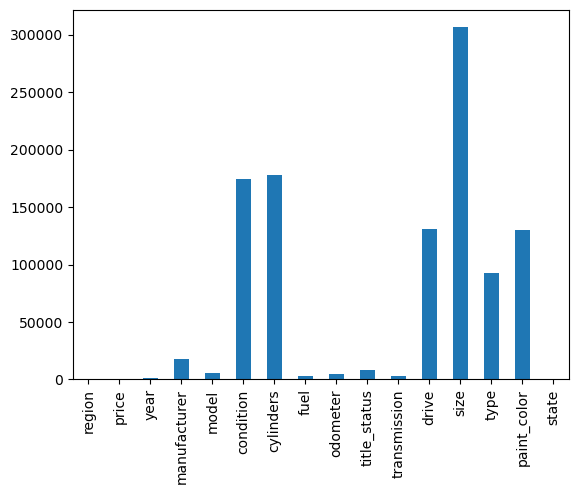

In [47]:
df.isnull().sum().plot(kind='bar') 
plt.show()

We need to deal with missing values. If we decide to drop null values, we would lose about 75% of the data because of the missing values in size. Condition, cylinders, drive, type, and paint_color will also eliminate many samples from the decide if we drop missing values.

Once unnecessary columns are removed, inspect unique values of object like columns to understand what information these columns provide and determine which columns are worth keeping.

In [5]:
object_columns = df.select_dtypes(include="object")
unique_values = {}
for col in object_columns:
    print(f'Column: {col}')
    print(object_columns[col].unique())

Column: region
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 'colorado 

There are many NaN values in columns where the mean cannot be used to fill in missing values. Drop all rows with missing values

In [6]:

df.dropna(inplace=True)
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
55,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al
59,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al
65,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al
73,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,wyoming,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck,blue,wy
426809,wyoming,18000,1990.0,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV,black,wy
426831,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,red,wy
426833,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,wy


At a first glance, columns 'region' and 'state' may be irrelevant to determine the price of a car. The 'model' column has many different values to be useful for regression analysis, but from business understanding, the model includes the trim of a car, which is a big factor in the price of brand new cars.

Inspect the 'model' column further.

In [7]:
df['model'].value_counts()

model
f-150                        1637
silverado 1500               1434
1500                          882
camry                         683
accord                        659
                             ... 
997                             1
e350 extended club wagon        1
s60 t6 r design                 1
q7 quattro prestige sline       1
gand wagoneer                   1
Name: count, Length: 9529, dtype: int64

In [19]:
df.describe()

,price,year,odometer
count,7.919500e+04,79195.000000,7.919500e+04
mean,7.943274e+04,2008.481937,1.244489e+05
std,1.387575e+07,9.993920,2.430582e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.950000e+03,2006.000000,7.300000e+04
50%,9.000000e+03,2011.000000,1.140000e+05
75%,1.750000e+04,2014.000000,1.554140e+05
max,3.736929e+09,2022.000000,1.000000e+07


After analyzing the statistical summary, there are some values that stand out:
- There are some cars which it's price is 0
- There are some cars from 1900
- There are some cars with 0 miles

In [18]:
prices = df['price'].value_counts()
prices

price
0         3457
4500       996
3500       987
6500       935
5500       872
          ... 
14960        1
129995       1
2935         1
59998        1
27294        1
Name: count, Length: 4241, dtype: int64

In [20]:
years = df['year'].value_counts()
years

year
2013.0    5626
2014.0    5253
2015.0    5022
2012.0    4898
2011.0    4747
          ... 
1925.0       1
1905.0       1
1918.0       1
1900.0       1
1944.0       1
Name: count, Length: 102, dtype: int64

In [22]:
miles = df['odometer'].value_counts()
miles

odometer
200000.0    600
100000.0    570
150000.0    483
160000.0    412
140000.0    397
           ... 
23575.0       1
79329.0       1
122377.0      1
37801.0       1
69550.0       1
Name: count, Length: 28024, dtype: int64

In [28]:
cars_price_0 = df.query('price == 0')
cars_price_0

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
126,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white,al
127,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white,al
128,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white,al
244,birmingham,0,2017.0,chevrolet,silverado 2500hd 4x4,like new,8 cylinders,diesel,102000.0,clean,automatic,4wd,full-size,truck,silver,al
362,birmingham,0,2017.0,chevrolet,silverado 2500 z71 4x4,like new,8 cylinders,diesel,102000.0,clean,automatic,4wd,full-size,truck,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425403,sheboygan,0,2013.0,gmc,acadia,excellent,6 cylinders,gas,152207.0,clean,automatic,4wd,full-size,SUV,red,wi
425739,wausau,0,2019.0,dodge,pickups,new,3 cylinders,gas,100000.0,clean,manual,fwd,compact,bus,black,wi
426525,wyoming,0,1973.0,rover,defender,excellent,4 cylinders,diesel,48000.0,clean,manual,4wd,mid-size,SUV,yellow,wy
426539,wyoming,0,2016.0,toyota,4runner trd pro,excellent,6 cylinders,gas,45286.0,clean,automatic,4wd,full-size,SUV,brown,wy


<Axes: xlabel='condition'>

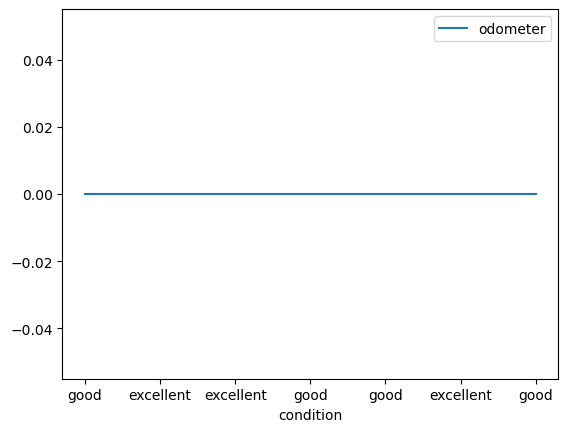

In [34]:
cars_odo_0 = df.query('odometer == 0')
cars_odo_0.plot(x='condition', y='odometer')

<Axes: xlabel='condition', ylabel='odometer'>

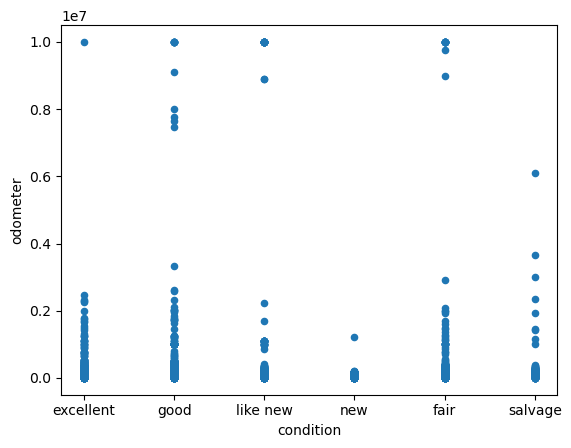

In [32]:
df.plot.scatter(x='condition', y='odometer')

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.